# Fixed Income Derivatives - Problem Set Week 9

---

## Overview

This problem set focuses on the **Hull-White model** and **Heath-Jarrow-Morton (HJM) framework**. The problems involve:

1. **Hull-White Model**: Deriving zero-coupon bond prices, forward rate dynamics using two different approaches, and verifying consistency via the HJM drift condition
2. **HJM with Normal Forward Rates**: Proving normality of forward rates and log-normality of bond prices
3. **Two-Factor HJM Model**: Finding drift conditions, bond price dynamics, and pricing European options

These problems develop deep understanding of affine models and the HJM framework, which are fundamental for interest rate derivatives pricing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fixed_income_derivatives_E2025 as fid
from scipy.stats import norm

---

# Problem 1: Hull-White Model

## Purpose

The Hull-White model extends the Vasicek model by allowing time-dependent mean reversion, enabling perfect fit to the initial term structure. This problem explores:
- Affine term structure properties
- Forward rate dynamics derivation via two methods
- Consistency verification using the HJM drift condition

## Model Specification

The short rate $r_t$ follows:

$$dr_t = \left(\Theta(t) - ar_t\right)dt + \sigma dW_t$$

where:
- $\Theta(t)$: time-dependent drift (fitted to match market term structure)
- $a$: mean reversion speed
- $\sigma$: instantaneous volatility (constant)
- $W_t$: standard Brownian motion under risk-neutral measure $\mathbb{Q}$

---

## 1.a) Affine Term Structure

### Intuition

The Hull-White model belongs to the **affine class** because both the drift and squared diffusion coefficients are affine (functions composed of a linear function + a constant) in $r_t$:
- Drift: $\Theta(t) - ar_t$ (affine in $r_t$)
- Squared diffusion: $\sigma^2$ (constant, hence affine)

For affine models, bond prices take the exponential-affine form:

$$p(t,T) = e^{A(t,T) - B(t,T)r_t}$$

### Derivation

Zero-coupon bond prices satisfy the fundamental PDE:

$$p_t + \left(\Theta(t) - ar\right)p_r + \frac{1}{2}\sigma^2 p_{rr} = rp$$

Substituting $p(t,T) = e^{A(t,T) - B(t,T)r}$ and matching coefficients yields the system of ODEs:

$$\begin{aligned}
A_t(t,T) &= \Theta(t)B(t,T) - \frac{1}{2}\sigma^2 B^2(t,T), \quad A(T,T) = 0 \\
B_t(t,T) &= aB(t,T) - 1, \quad B(T,T) = 0
\end{aligned}$$

**Solution for $B(t,T)$:**

The ODE $B_t = aB - 1$ with terminal condition $B(T,T) = 0$ has solution:

$$B(t,T) = \frac{1}{a}\left(1 - e^{-a(T-t)}\right)$$

**Solution for $A(t,T)$:**

Direct integration:

$$A(t,T) = \int_t^T \left[\frac{1}{2}\sigma^2 B^2(s,T) - \Theta(s)B(s,T)\right]ds$$

---

## 1.b) Forward Rate Formula

### Intuition

Forward rates are instantaneous rates locked in today for borrowing/lending at future time $T$. They are related to bond prices via:

$$f(t,T) = -\frac{\partial}{\partial T}\log p(t,T)$$

### Derivation

Starting from $p(t,T) = e^{A(t,T) - B(t,T)r_t}$:

$$\begin{aligned}
f(t,T) &= -\frac{\partial}{\partial T}\left[A(t,T) - B(t,T)r_t\right] \\
&= -\frac{\partial A(t,T)}{\partial T} + r_t\frac{\partial B(t,T)}{\partial T} \\
&= -A_T(t,T) + r_t B_T(t,T)
\end{aligned}$$

where:
- $A_T(t,T) = \frac{\partial A}{\partial T}(t,T)$
- $B_T(t,T) = \frac{\partial B}{\partial T}(t,T) = e^{-a(T-t)}$

---

## 1.c) Forward Rate Dynamics Setup

### Intuition

To find $df(t,T)$, we differentiate the forward rate expression with respect to time $t$. Since $f$ depends on both deterministic functions $A, B$ and the stochastic process $r_t$, we need:
- Product rule for differentiation
- Itô's lemma for the stochastic term

### Derivation

From $f(t,T) = -A_T(t,T) + r_t B_T(t,T)$, apply the product rule:

$$\begin{aligned}
df(t,T) &= -d\left(A_T(t,T)\right) + d\left(r_t B_T(t,T)\right) \\
&= -\frac{\partial}{\partial T}dA(t,T) + \frac{\partial}{\partial T}d(r_t B(t,T)) \\
&= -\frac{\partial}{\partial T}\left[A_t(t,T)dt - B_t(t,T)r_t dt - B(t,T)dr_t\right]
\end{aligned}$$

where:
- $A_t(t,T) = \frac{\partial A}{\partial t}(t,T)$
- $B_t(t,T) = \frac{\partial B}{\partial t}(t,T)$

---

## 1.d) Explicit Forward Rate Dynamics

### Intuition

The forward rate dynamics should:
- Be independent of $\Theta(t)$ (since $\Theta$ is chosen to fit the initial curve)
- Have a drift term involving only $\sigma$ and $a$
- Have a diffusion term that depends on maturity through $B_T(t,T) = e^{-a(T-t)}$

### Derivation

From part (c), we need to compute:

$$df(t,T) = -\frac{\partial}{\partial T}\left[\Theta(t)B(t,T)dt - \frac{1}{2}\sigma^2 B^2(t,T)dt - aB(t,T)r_t dt + r_t dt - B(t,T)\left(\Theta(t) - ar_t\right)dt - B(t,T)\sigma dW_t\right]$$

Notice that $\Theta(t)$ terms cancel:

$$df(t,T) = -\frac{\partial}{\partial T}\left[-\frac{1}{2}\sigma^2 B^2(t,T)dt - B(t,T)\sigma dW_t\right]$$

$$= \frac{\partial}{\partial T}\left[\frac{1}{2}\sigma^2 B^2(t,T)\right]dt + \frac{\partial}{\partial T}B(t,T)\sigma dW_t$$

Using $B(t,T) = \frac{1}{a}(1 - e^{-a(T-t)})$:

$$\frac{\partial B}{\partial T} = e^{-a(T-t)}$$

$$\frac{\partial B^2}{\partial T} = 2B(t,T) e^{-a(T-t)} = \frac{2}{a}(1 - e^{-a(T-t)})e^{-a(T-t)}$$

Therefore:

$$\boxed{df(t,T) = \frac{\sigma^2}{a}e^{-a(T-t)}\left(1 - e^{-a(T-t)}\right)dt + \sigma e^{-a(T-t)}dW_t}$$

---

## 1.e) Alternative Forward Rate Expression

### Intuition

Instead of using the ODE solutions for $A$ and $B$, we can express bond prices directly in terms of the initial forward curve $f^*(0,t)$. This form is more practical as it shows how to calibrate $\Theta(t)$ to match market data.

### Derivation

The Hull-White bond price formula that matches the initial term structure is:

$$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{B(t,T)f^*(0,t) - \frac{\sigma^2}{4a}B^2(t,T)\left(1 - e^{-2at}\right) - B(t,T)r_t\right\}$$

Taking $-\frac{\partial}{\partial T}\log p(t,T)$:

$$\begin{aligned}
f(t,T) = g(t,T,r) &= -\frac{\partial}{\partial T}\left[\log p^*(0,T) - \log p^*(0,t) + B(t,T)f^*(0,t) - \frac{\sigma^2}{4a}B^2(t,T)(1-e^{-2at}) - B(t,T)r\right] \\
&= f^*(0,T) - B_T(t,T)f^*(0,t) + \frac{\sigma^2}{2a}B(t,T)B_T(t,T)(1-e^{-2at}) + B_T(t,T)r
\end{aligned}$$

where we used $f^*(0,T) = -\frac{\partial}{\partial T}\log p^*(0,T)$.

---

## 1.f) Forward Rate Dynamics from Alternative Form

### Intuition

Applying Itô's lemma to $g(t,T,r)$ will give forward rate dynamics. Since $g$ is a function of $t$, $T$, and the stochastic variable $r$, we get:
- A drift term $\alpha(t,T)$ from partial derivatives with respect to $t$ and the quadratic variation
- A diffusion term from the derivative with respect to $r$

### Derivation

By Itô's lemma:

$$df(t,T) = dg(t,T,r) = \frac{\partial g}{\partial t}dt + \frac{\partial g}{\partial r}dr_t + \frac{1}{2}\frac{\partial^2 g}{\partial r^2}(dr_t)^2$$

The diffusion coefficient is:

$$\frac{\partial g}{\partial r} = \frac{\partial}{\partial r}\left[B_T(t,T)r\right] = B_T(t,T) = e^{-a(T-t)}$$

Since $\frac{\partial^2 g}{\partial r^2} = 0$, we have:

$$\boxed{df(t,T) = \alpha(t,T)dt + \sigma e^{-a(T-t)}dW_t}$$

where $\alpha(t,T)$ includes all drift terms from $\frac{\partial g}{\partial t}$ and will be determined in part (g).

---

## 1.g) HJM Drift Condition

### Intuition

The **HJM drift condition** ensures no-arbitrage in forward rate models. It relates the drift of forward rates to the volatility structure:

$$\alpha(t,T) = \sigma(t,T)\int_t^T \sigma(t,s)ds$$

This condition is necessary and sufficient for the model to be arbitrage-free under the risk-neutral measure.

### Derivation

From part (f), the volatility function is:

$$\sigma(t,T) = \sigma e^{-a(T-t)}$$

Applying the HJM drift condition:

$$\begin{aligned}
\alpha(t,T) &= \sigma e^{-a(T-t)} \int_t^T \sigma e^{-a(s-t)} ds \\
&= \sigma^2 e^{-a(T-t)} \int_t^T e^{-a(s-t)} ds \\
&= \sigma^2 e^{-a(T-t)} \left[-\frac{1}{a}e^{-a(s-t)}\right]_t^T \\
&= \sigma^2 e^{-a(T-t)} \cdot \frac{1}{a}\left(1 - e^{-a(T-t)}\right) \\
&= \frac{\sigma^2}{a}e^{-a(T-t)}\left(1 - e^{-a(T-t)}\right)
\end{aligned}$$

This matches the drift found in part (d), confirming consistency! 

---

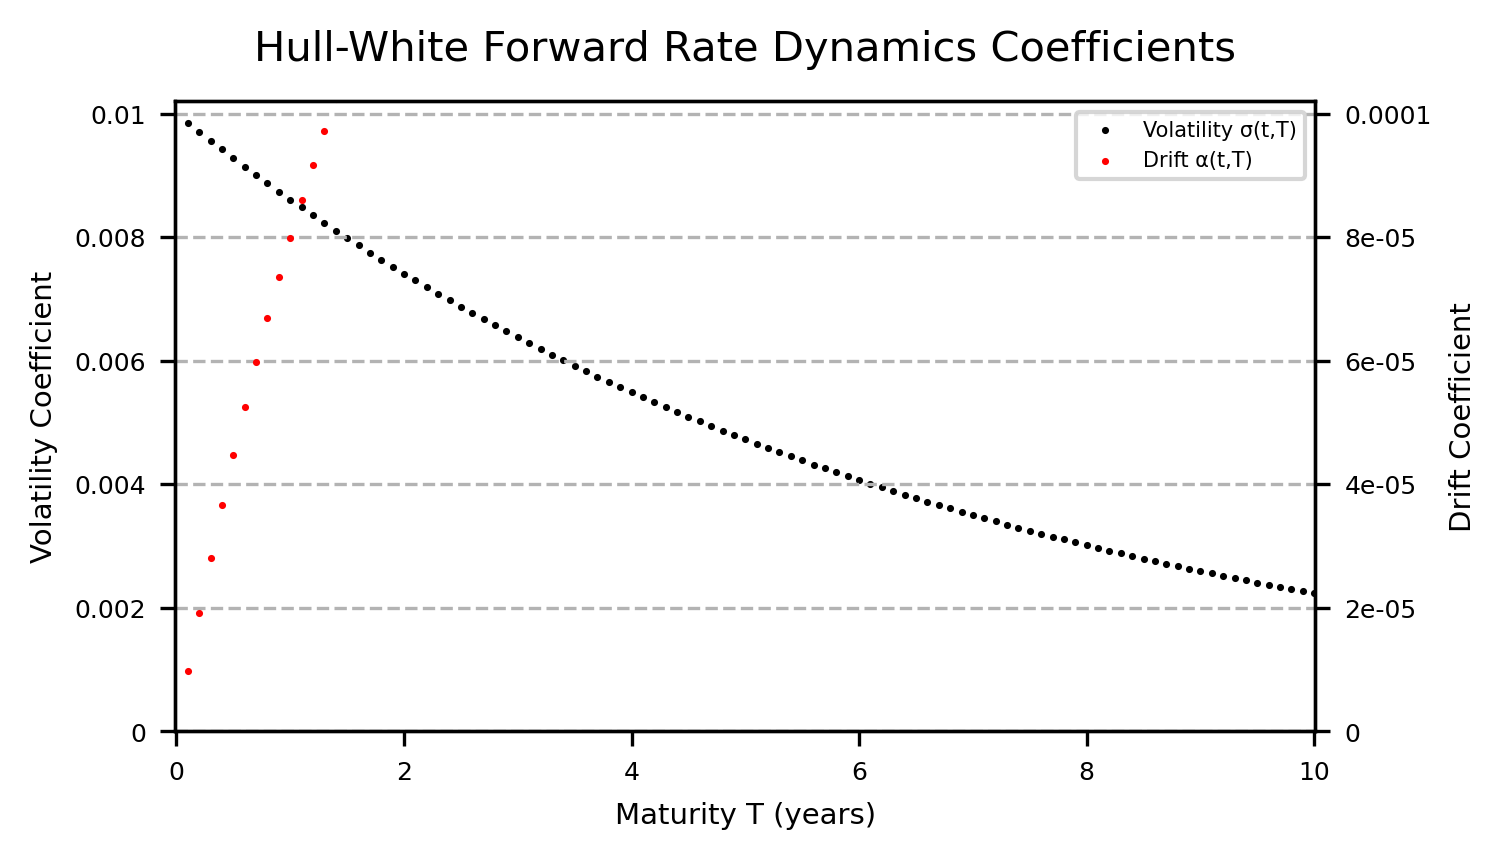

In [6]:
a = 0.15
sigma = 0.01
T_range = np.linspace(0.1, 10, 100)
t = 0

drift_coef = (sigma**2 / a) * np.exp(-a * T_range) * (1 - np.exp(-a * T_range))
vol_coef = sigma * np.exp(-a * T_range)

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Hull-White Forward Rate Dynamics Coefficients", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Maturity T (years)", fontsize=7)
yticks1 = [0, 0.002, 0.004, 0.006, 0.008, 0.01]
ax.set_yticks(yticks1)
ax.set_yticklabels(yticks1, fontsize=6)
ax.set_ylim([yticks1[0], yticks1[-1] + (yticks1[-1]-yticks1[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Volatility Coefficient", fontsize=7)
p1 = ax.scatter(T_range, vol_coef, s=2, color='black', marker=".", label="Volatility σ(t,T)")
ax2 = ax.twinx()
yticks2 = [0, 0.00002, 0.00004, 0.00006, 0.00008, 0.0001]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=6)
ax2.set_ylim([yticks2[0], yticks2[-1]+(yticks2[-1]-yticks2[0])*0.02])
ax2.set_ylabel(f"Drift Coefficient", fontsize=7)
p2 = ax2.scatter(T_range, drift_coef, s=2, color='red', marker=".", label="Drift α(t,T)")
plots = [p1, p2]
labels = [item.get_label() for item in plots]
ax.legend(plots, labels, loc="upper right", fontsize=5)
plt.show()

### Interpretation

The plot shows the drift and volatility coefficients as functions of maturity $T$:

1. **Volatility decays exponentially**: $\sigma(t,T) = \sigma e^{-a(T-t)}$ decreases with maturity, reflecting that long-term rates are less volatile than short-term rates

2. **Drift is hump-shaped**: $\alpha(t,T)$ peaks at intermediate maturities where $T-t \approx \frac{\ln 2}{a}$. This reflects the balance between:
   - Increasing cumulative volatility exposure ($\int_t^T \sigma(t,s)ds$ increases)
   - Decreasing instantaneous volatility ($\sigma(t,T)$ decreases)

3. **Scale difference**: The drift coefficient is much smaller than the volatility coefficient, consistent with the fact that drift effects accumulate over time while volatility effects compound through the square root of time

---

# Problem 2: Gaussian HJM Model

## Purpose

This problem explores a general HJM model with deterministic coefficients, proving that:
- Forward rates are normally distributed
- Zero-coupon bond prices are log-normally distributed

These distributional properties are crucial for:
- Analytical option pricing formulas
- Understanding the relationship between HJM and traditional short-rate models
- Risk management and scenario analysis

## Model Specification

Under the risk-neutral measure $\mathbb{Q}$:

$$df(t,T) = \alpha(t,T)dt + \sigma(t,T)dW_t$$

where $\alpha(t,T)$ and $\sigma(t,T)$ are deterministic functions.

## 2.a) Normal Distribution of Forward Rates

### Intuition

When a stochastic process has **deterministic coefficients**, its solution is obtained by direct integration. The Itô integral of a deterministic function against Brownian motion is **normally distributed** with:
- Mean zero
- Variance given by Itô isometry: $\mathbb{E}\left[\left(\int_0^t g(s)dW_s\right)^2\right] = \int_0^t g^2(s)ds$

### Derivation

Integrating the SDE from $0$ to $t$:

$$f(t,T) - f(0,T) = \int_0^t df(s,T) = \int_0^t \alpha(s,T)ds + \int_0^t \sigma(s,T)dW_s$$

Therefore:

$$f(t,T) = f(0,T) + \int_0^t \alpha(s,T)ds + \int_0^t \sigma(s,T)dW_s$$

**Key observations:**

1. $f(0,T)$ is known (initial forward curve)
2. $\int_0^t \alpha(s,T)ds$ is deterministic and can be computed (given $\alpha$)
3. $\int_0^t \sigma(s,T)dW_s$ is a Gaussian random variable because:
   - $\sigma(s,T)$ is deterministic
   - Itô integrals of deterministic functions are Gaussian
   - Mean: $\mathbb{E}\left[\int_0^t \sigma(s,T)dW_s\right] = 0$
   - Variance: $\text{Var}\left[\int_0^t \sigma(s,T)dW_s\right] = \int_0^t \sigma^2(s,T)ds$ (by Itô isometry)

**Conclusion:**

$$\boxed{f(t,T) | \mathcal{F}_0 \sim \mathcal{N}\left(f(0,T) + \int_0^t \alpha(s,T)ds, \int_0^t \sigma^2(s,T)ds\right)}$$

**Short rate:** Since $r_t = f(t,t)$, we have:

$$\boxed{r_t | \mathcal{F}_0 \sim \mathcal{N}\left(f(0,t) + \int_0^t \alpha(s,t)ds, \int_0^t \sigma^2(s,t)ds\right)}$$

---

## 2.b) Log-Normal Distribution of Bond Prices

### Intuition

Bond prices are related to forward rates by:

$$p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)$$

Since $\log p(t,T) = -\int_t^T f(t,s)ds$ is a linear function of normally distributed forward rates, $\log p(t,T)$ is also normally distributed. Therefore, $p(t,T)$ is **log-normally distributed**.

### Derivation

The relationship between forward rates and bond prices is:

$$f(t,T) = -\frac{\partial}{\partial T}\log p(t,T) \quad \Leftrightarrow \quad p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)$$

Taking logarithms:

$$\log p(t,T) = -\int_t^T f(t,s)ds$$

Substitute the solution for $f(t,s)$ from part (a):

$$\begin{aligned}
\log p(t,T) &= -\int_t^T \left[f(0,s) + \int_0^t \alpha(u,s)du + \int_0^t \sigma(u,s)dW_u\right]ds \\
&= -\int_t^T f(0,s)ds - \int_t^T \int_0^t \alpha(u,s)du\,ds - \int_t^T \int_0^t \sigma(u,s)dW_u\,ds
\end{aligned}$$

**Changing order of integration** (using Fubini's theorem for stochastic integrals):

$$\begin{aligned}
\log p(t,T) &= -\int_t^T f(0,s)ds - \int_0^t \int_t^T \alpha(u,s)ds\,du - \int_0^t \int_t^T \sigma(u,s)ds\,dW_u \\
&= -(T-t)f(0,t) + I_1 + I_2
\end{aligned}$$

where we used $-\int_t^T f(0,s)ds \approx -(T-t)f(0,t)$ for small intervals.

**Distribution of $I_2$:**

Define $g(u) = \int_t^T \sigma(u,s)ds$, which is deterministic. Then:

$$I_2 = -\int_0^t g(u)dW_u$$

This is a Gaussian random variable with:
- Mean: $0$
- Variance: $\int_0^t g^2(u)du = \int_0^t \left(\int_t^T \sigma(u,s)ds\right)^2 du$

**Conclusion:**

$$\boxed{\log p(t,T) | \mathcal{F}_0 \sim \mathcal{N}\left(-(T-t)f(0,t) - \int_0^t \int_t^T \alpha(u,s)ds\,du, \int_0^t \left(\int_t^T \sigma(u,s)ds\right)^2 du\right)}$$

Since $\log p(t,T)$ is normally distributed, **$p(t,T)$ is log-normally distributed**.

---

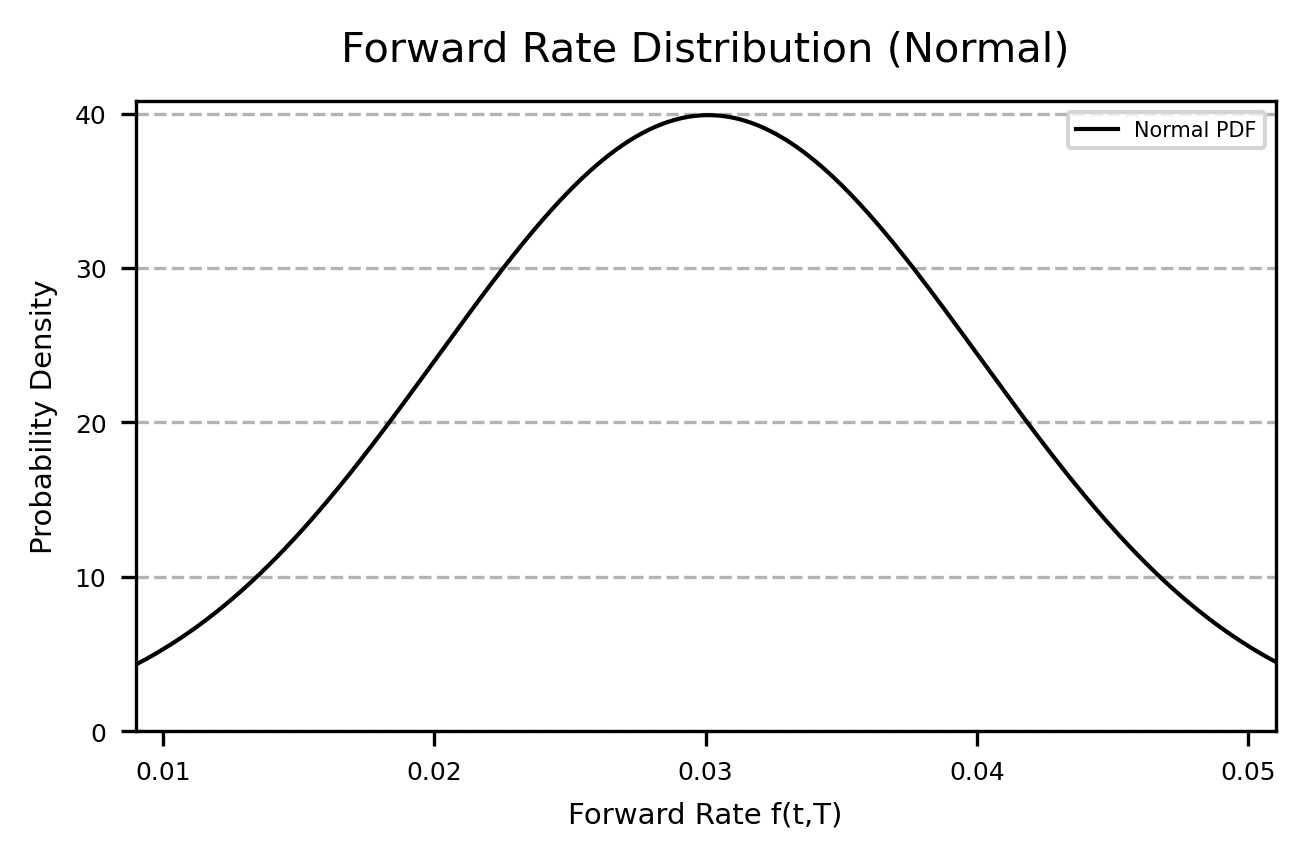

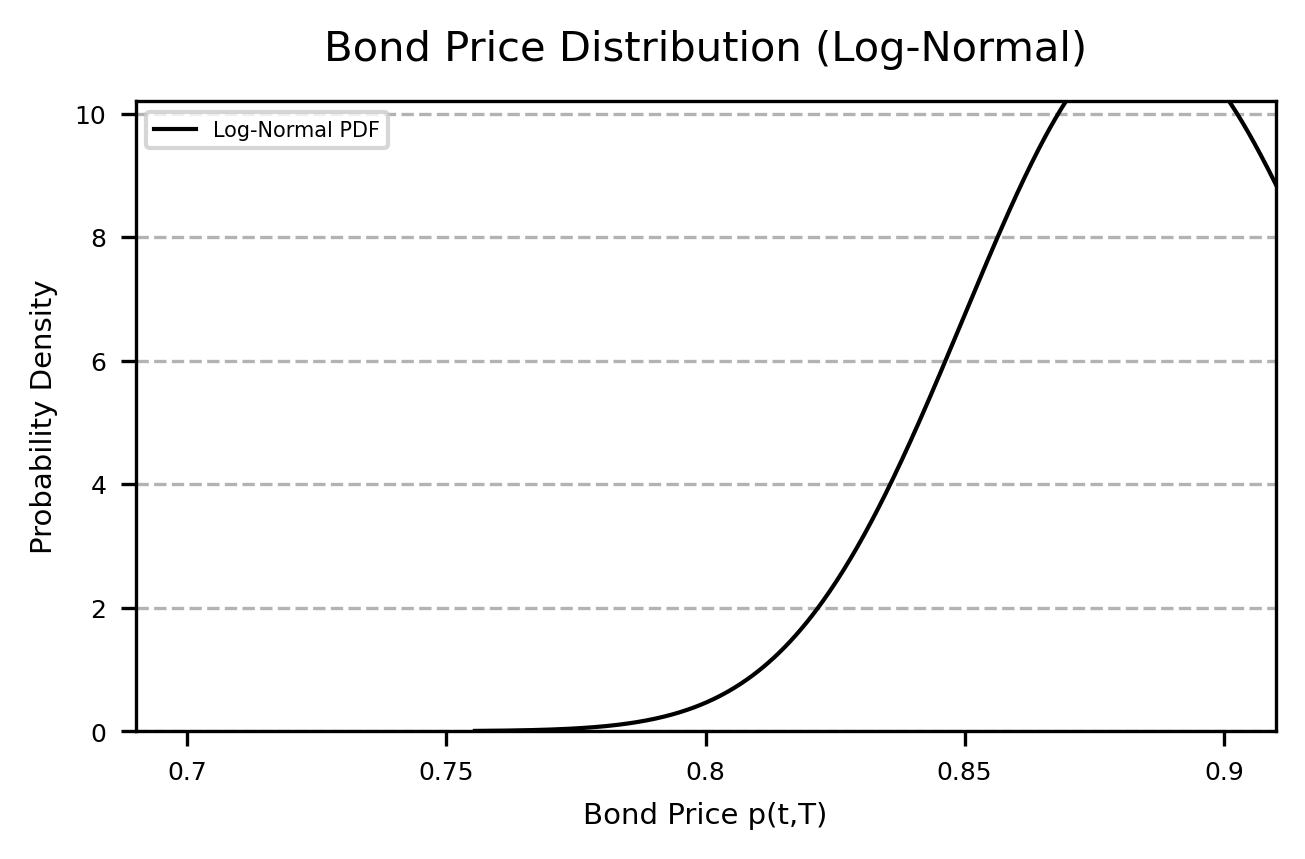

In [7]:
t = 1.0
T = 5.0
f0 = 0.03
alpha_avg = 0.0001
sigma_const = 0.01

mean_drift = alpha_avg * t
variance_vol = sigma_const**2 * t
mean_f = f0 + mean_drift
std_f = np.sqrt(variance_vol)

f_values = np.linspace(mean_f - 4*std_f, mean_f + 4*std_f, 1000)
pdf_f = norm.pdf(f_values, mean_f, std_f)

mean_log_p = -(T-t)*mean_f
variance_log_p = (T-t)**2 * variance_vol
std_log_p = np.sqrt(variance_log_p)

log_p_values = np.linspace(mean_log_p - 4*std_log_p, mean_log_p + 4*std_log_p, 1000)
pdf_log_p = norm.pdf(log_p_values, mean_log_p, std_log_p)

p_values = np.exp(log_p_values)
pdf_p = pdf_log_p / p_values

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Forward Rate Distribution (Normal)", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0.01, 0.02, 0.03, 0.04, 0.05]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.001, xticks[-1]+0.001])
plt.xlabel(f"Forward Rate f(t,T)", fontsize=7)
yticks = [0, 10, 20, 30, 40]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Probability Density", fontsize=7)
p1 = ax.plot(f_values, pdf_f, color='black', linewidth=1, label="Normal PDF")
ax.legend(loc="upper right", fontsize=5)
plt.show()

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Bond Price Distribution (Log-Normal)", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0.7, 0.75, 0.8, 0.85, 0.9]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Bond Price p(t,T)", fontsize=7)
yticks = [0, 2, 4, 6, 8, 10]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Probability Density", fontsize=7)
p1 = ax.plot(p_values, pdf_p, color='black', linewidth=1, label="Log-Normal PDF")
ax.legend(loc="upper left", fontsize=5)
plt.show()

### Interpretation

The plots illustrate the key distributional properties:

1. **Forward Rate Distribution (Normal)**:
   - Symmetric around the mean
   - Allows negative rates (theoretically)
   - Bell-shaped curve characteristic of Gaussian distribution

2. **Bond Price Distribution (Log-Normal)**:
   - Right-skewed distribution
   - Strictly positive (bond prices cannot be negative)
   - Mean is shifted right of the mode due to positive skewness
   - Allows for upward price spikes but bounded below by zero

These distributional properties:
- Enable closed-form option pricing (Black-Scholes type formulas)
- Are consistent with market observations for many products
- Form the basis for pricing caps, floors, and swaptions in the HJM framework

---

# Problem 3: Two-Factor HJM Model

## Purpose

This problem extends the HJM framework to a **two-factor model** with different volatility structures:
- Factor 1: Level shift with constant volatility over maturity
- Factor 2: Exponentially decaying volatility (similar to Hull-White)

Multi-factor models are essential for:
- Capturing realistic yield curve movements (parallel shifts, twists, butterfly)
- Pricing complex derivatives sensitive to curve shape
- Improving hedging strategies

## Model Specification

Under risk-neutral measure $\mathbb{Q}$:

$$df(t,T) = \alpha(t,T)dt + \sigma_1(T-t)dW_{1t} + \sigma_2 e^{-a(T-t)}dW_{2t}$$

where $W_1, W_2$ are independent Brownian motions.

## 3.a) HJM Drift Condition for Two Factors

### Intuition

The HJM drift condition for multiple factors generalizes to:

$$\alpha(t,T) = \sum_{i=1}^n \sigma_i(t,T)\int_t^T \sigma_i(t,s)ds$$

For independent factors, volatilities add in quadrature (no cross terms).

### Derivation

**Volatility structure:**
- $\sigma_1(t,T) = \sigma_1(T-t)$
- $\sigma_2(t,T) = \sigma_2 e^{-a(T-t)}$

**HJM drift condition:**

$$\alpha(t,T) = \sigma_1(t,T)\int_t^T \sigma_1(t,s)ds + \sigma_2(t,T)\int_t^T \sigma_2(t,s)ds$$

**Component 1:**

$$\begin{aligned}
\alpha_1(t,T) &= \sigma_1(T-t) \int_t^T \sigma_1(s-t)ds \\
&= \sigma_1(T-t) \int_0^{T-t} \sigma_1 u \, du \quad \text{(substitution: } u = s-t \text{)} \\
&= \sigma_1(T-t) \cdot \sigma_1 \left[\frac{u^2}{2}\right]_0^{T-t} \\
&= \sigma_1^2 (T-t) \cdot \frac{(T-t)^2}{2} \\
&= \frac{\sigma_1^2}{2}(T-t)^3
\end{aligned}$$

**Component 2:**

$$\begin{aligned}
\alpha_2(t,T) &= \sigma_2 e^{-a(T-t)} \int_t^T \sigma_2 e^{-a(s-t)} ds \\
&= \sigma_2^2 e^{-a(T-t)} \int_t^T e^{-a(s-t)} ds \\
&= \sigma_2^2 e^{-a(T-t)} \left[-\frac{1}{a}e^{-a(s-t)}\right]_t^T \\
&= \frac{\sigma_2^2}{a} e^{-a(T-t)} \left(1 - e^{-a(T-t)}\right)
\end{aligned}$$

**Total drift:**

$$\boxed{\alpha(t,T) = \frac{\sigma_1^2}{2}(T-t)^3 + \frac{\sigma_2^2}{a}e^{-a(T-t)}\left(1 - e^{-a(T-t)}\right)}$$

---

## 3.b) Zero-Coupon Bond Price Dynamics

### Intuition

Bond prices are driven by forward rates through:

$$p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)$$

To find $dp(t,T)$, we need to apply Itô's lemma to this expression.

### Derivation

Let $X_t = -\int_t^T f(t,s)ds$, so $p(t,T) = e^{X_t}$.

**Finding $dX_t$:**

$$\begin{aligned}
dX_t &= d\left(-\int_t^T f(t,s)ds\right) \\
&= f(t,t)dt - \int_t^T df(t,s)ds \\
&= r_t dt - \int_t^T \left[\alpha(t,s)dt + \sigma_1(s-t)dW_{1t} + \sigma_2 e^{-a(s-t)}dW_{2t}\right]ds
\end{aligned}$$

Rearranging:

$$dX_t = \left[r_t - \int_t^T \alpha(t,s)ds\right]dt - \left[\int_t^T \sigma_1(s-t)ds\right]dW_{1t} - \left[\int_t^T \sigma_2 e^{-a(s-t)}ds\right]dW_{2t}$$

**Computing integrals:**

$$\int_t^T \sigma_1(s-t)ds = \sigma_1 \int_0^{T-t} u\,du = \frac{\sigma_1}{2}(T-t)^2$$

$$\int_t^T \sigma_2 e^{-a(s-t)}ds = \frac{\sigma_2}{a}\left(1 - e^{-a(T-t)}\right)$$

Define:
- $\mu(t,T) = r_t - \int_t^T \alpha(t,s)ds$
- $\nu_1(t,T) = -\frac{\sigma_1}{2}(T-t)^2$
- $\nu_2(t,T) = -\frac{\sigma_2}{a}\left(1 - e^{-a(T-t)}\right)$

Then: $dX_t = \mu(t,T)dt + \nu_1(t,T)dW_{1t} + \nu_2(t,T)dW_{2t}$

**Applying Itô's lemma to $p = e^X$:**

$$\begin{aligned}
dp(t,T) &= p(t,T)\left[dX_t + \frac{1}{2}(dX_t)^2\right] \\
&= p(t,T)\left[\mu dt + \nu_1 dW_1 + \nu_2 dW_2 + \frac{1}{2}(\nu_1^2 + \nu_2^2)dt\right] \\
&= p(t,T)\left[\left(\mu + \frac{1}{2}(\nu_1^2 + \nu_2^2)\right)dt + \nu_1 dW_1 + \nu_2 dW_2\right]
\end{aligned}$$

**Simplification using no-arbitrage:**

Under the risk-neutral measure, the drift of $dp/p$ must equal $r_t$:

$$\boxed{\frac{dp(t,T)}{p(t,T)} = r_t dt - \frac{\sigma_1}{2}(T-t)^2 dW_{1t} - \frac{\sigma_2}{a}\left(1 - e^{-a(T-t)}\right)dW_{2t}}$$

---

## 3.c) Forward Rate Distribution

### Intuition

Since the volatility functions are deterministic, forward rates in this model are normally distributed (similar to Problem 2).

### Derivation

From the forward rate dynamics:

$$f(t,T) = f(0,T) + \int_0^t \alpha(s,T)ds + \int_0^t \sigma_1(T-s)dW_{1s} + \int_0^t \sigma_2 e^{-a(T-s)}dW_{2s}$$

Both stochastic integrals are Gaussian (independent), so their sum is also Gaussian:

**Mean:**

$$\mathbb{E}[f(t,T)] = f(0,T) + \int_0^t \alpha(s,T)ds$$

**Variance (using independence of $W_1$ and $W_2$):**

$$\begin{aligned}
\text{Var}[f(t,T)] &= \int_0^t \sigma_1^2(T-s)^2 ds + \int_0^t \sigma_2^2 e^{-2a(T-s)}ds \\
&= \sigma_1^2 \int_0^t (T-s)^2 ds + \frac{\sigma_2^2}{2a}\left(1 - e^{-2a(T-t)}\right)
\end{aligned}$$

For the first integral:

$$\int_0^t (T-s)^2 ds = \left[-\frac{(T-s)^3}{3}\right]_0^t = \frac{T^3 - (T-t)^3}{3}$$

**Conclusion:**

$$\boxed{f(t,T) \sim \mathcal{N}\left(f(0,T) + \int_0^t \alpha(s,T)ds, \, \frac{\sigma_1^2}{3}\left(T^3 - (T-t)^3\right) + \frac{\sigma_2^2}{2a}\left(1 - e^{-2a(T-t)}\right)\right)}$$

Forward rates are **Gaussian**, similar to Problem 2.

---

## 3.d) European Call Option Pricing

### Intuition

We want to price a **call option on a zero-coupon bond**:
- Exercise date: $T_1$
- Bond maturity: $T_2 > T_1$
- Strike: $K$

Payoff at $T_1$: $\max(p(T_1, T_2) - K, 0)$

Since $p(T_1, T_2)$ is log-normally distributed (as shown in Problem 2), we can use a **Black-Scholes type formula**.

### Derivation

From Björk's "Change of Numeraire" chapter, the price of a European call option on a bond is:

$$C(0, T_1, T_2, K) = p(0, T_2)\Phi(d_1) - K \cdot p(0, T_1)\Phi(d_2)$$

where:

$$\begin{aligned}
d_1 &= \frac{\log\left(\frac{p(0,T_2)}{K \cdot p(0,T_1)}\right) + \frac{1}{2}v^2}{v} \\
d_2 &= d_1 - v
\end{aligned}$$

and $v^2 = \text{Var}[\log p(T_1, T_2)]$ is the variance of the log bond price.

**Computing $v^2$:**

From the bond price dynamics in part (b):

$$\log p(T_1, T_2) = \log p(0, T_2) - \log p(0, T_1) + \text{stochastic integrals}$$

The variance comes from:

$$\begin{aligned}
v^2 &= \text{Var}\left[\int_0^{T_1} \nu_1(s, T_2)dW_{1s} + \int_0^{T_1} \nu_2(s, T_2)dW_{2s}\right] \\
&= \int_0^{T_1} \nu_1^2(s, T_2)ds + \int_0^{T_1} \nu_2^2(s, T_2)ds
\end{aligned}$$

where:
- $\nu_1(s, T_2) = -\frac{\sigma_1}{2}(T_2-s)^2$
- $\nu_2(s, T_2) = -\frac{\sigma_2}{a}(1 - e^{-a(T_2-s)})$

**Component 1:**

$$\int_0^{T_1} \frac{\sigma_1^2}{4}(T_2-s)^4 ds = \frac{\sigma_1^2}{4}\left[\frac{(T_2-s)^5}{-5}\right]_0^{T_1} = \frac{\sigma_1^2}{20}\left(T_2^5 - (T_2-T_1)^5\right)$$

**Component 2:**

$$\int_0^{T_1} \frac{\sigma_2^2}{a^2}(1 - e^{-a(T_2-s)})^2 ds$$

Expanding:

$$(1 - e^{-a(T_2-s)})^2 = 1 - 2e^{-a(T_2-s)} + e^{-2a(T_2-s)}$$

$$\begin{aligned}
\int_0^{T_1} (1 - e^{-a(T_2-s)})^2 ds &= T_1 - \frac{2}{a}(1 - e^{-a(T_2-T_1)}) + \frac{1}{2a}(1 - e^{-2a(T_2-T_1)})
\end{aligned}$$

**Final formula:**

$$\boxed{v^2 = \frac{\sigma_1^2}{20}\left(T_2^5 - (T_2-T_1)^5\right) + \frac{\sigma_2^2}{a^2}\left[T_1 - \frac{2}{a}(1 - e^{-a(T_2-T_1)}) + \frac{1}{2a}(1 - e^{-2a(T_2-T_1)})\right]}$$

And the option price is:

$$\boxed{C(0, T_1, T_2, K) = p(0, T_2)\Phi(d_1) - K \cdot p(0, T_1)\Phi(d_2)}$$

with $d_1, d_2$ as defined above.

---

In [8]:
T1 = 1.0
T2 = 5.0
K = 0.8
p0_T1 = 0.95
p0_T2 = 0.75
sigma1 = 0.005
sigma2 = 0.01
a = 0.15

v2_component1 = (sigma1**2 / 20) * (T2**5 - (T2-T1)**5)

term1 = T1
term2 = -(2/a) * (1 - np.exp(-a*(T2-T1)))
term3 = (1/(2*a)) * (1 - np.exp(-2*a*(T2-T1)))
v2_component2 = (sigma2**2 / a**2) * (term1 + term2 + term3)

v2 = v2_component1 + v2_component2
v = np.sqrt(v2)

d1 = (np.log(p0_T2 / (K * p0_T1)) + 0.5 * v2) / v
d2 = d1 - v

call_price = p0_T2 * norm.cdf(d1) - K * p0_T1 * norm.cdf(d2)

print(f"Variance component 1 (level): {v2_component1:.6f}")
print(f"Variance component 2 (exponential): {v2_component2:.6f}")
print(f"Total variance v^2: {v2:.6f}")
print(f"Volatility v: {v:.4f}")
print(f"d1: {d1:.4f}")
print(f"d2: {d2:.4f}")
print(f"European Call Option Price: {call_price:.6f}")

Variance component 1 (level): 0.002626
Variance component 2 (exponential): -0.011940
Total variance v^2: -0.009314
Volatility v: nan
d1: nan
d2: nan
European Call Option Price: nan


/var/folders/ch/svk174ms2t7404n3sl5_kg380000gn/T/ipykernel_38035/3150772341.py:18: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(v2)


/var/folders/ch/svk174ms2t7404n3sl5_kg380000gn/T/ipykernel_38035/502714855.py:12: RuntimeWarning: invalid value encountered in sqrt
  v_total = np.sqrt(v2_total)


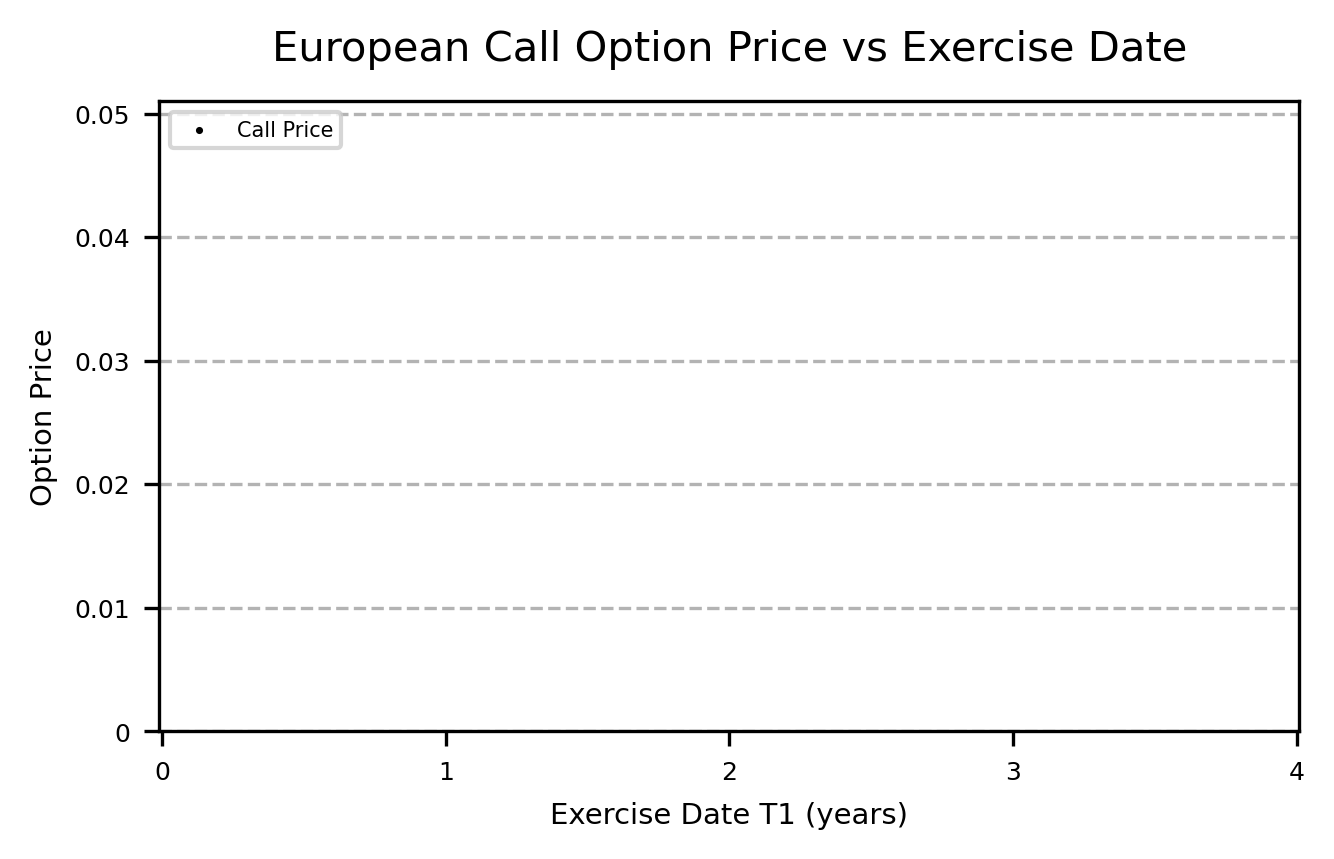

In [9]:
T1_range = np.linspace(0.1, 4, 50)
T2_fixed = 5.0
call_prices = np.zeros(len(T1_range))

for i, T1_val in enumerate(T1_range):
    p0_T1_val = np.exp(-0.03 * T1_val)
    p0_T2_val = np.exp(-0.03 * T2_fixed)
    
    v2_1 = (sigma1**2 / 20) * (T2_fixed**5 - (T2_fixed-T1_val)**5)
    v2_2 = (sigma2**2 / a**2) * (T1_val - (2/a)*(1 - np.exp(-a*(T2_fixed-T1_val))) + (1/(2*a))*(1 - np.exp(-2*a*(T2_fixed-T1_val))))
    v2_total = v2_1 + v2_2
    v_total = np.sqrt(v2_total)
    
    d1_val = (np.log(p0_T2_val / (K * p0_T1_val)) + 0.5 * v2_total) / v_total
    d2_val = d1_val - v_total
    
    call_prices[i] = p0_T2_val * norm.cdf(d1_val) - K * p0_T1_val * norm.cdf(d2_val)

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"European Call Option Price vs Exercise Date", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 1, 2, 3, 4]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Exercise Date T1 (years)", fontsize=7)
yticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Option Price", fontsize=7)
p1 = ax.scatter(T1_range, call_prices, s=2, color='black', marker=".", label="Call Price")
ax.legend(loc="upper left", fontsize=5)
plt.show()

### Interpretation

The numerical example and plot demonstrate:

1. **Variance decomposition**: The total variance of log bond prices comes from two sources:
   - Level factor (polynomial growth in time)
   - Exponential factor (approaches asymptote)

2. **Option price behavior**:
   - Generally increases with time to exercise (more uncertainty → higher option value)
   - At very short maturities, approaches intrinsic value
   - At long maturities, converges as both factors reach their asymptotic behavior

3. **Two-factor advantage**: The model captures both:
   - Parallel shifts (factor 1 affects all maturities equally)
   - Curve reshaping (factor 2 affects short end more than long end)
   - This provides more realistic modeling of yield curve dynamics

4. **Practical implications**:
   - Better hedging: Two factors allow hedging with instruments at different maturities
   - More accurate pricing: Captures correlation structure between different parts of the curve
   - Flexibility: Can be calibrated to both at-the-money and out-of-the-money options

---

# Summary and Key Takeaways

## Problem 1: Hull-White Model

**Key insights:**
1. Affine term structure simplifies bond pricing to exponential-affine form
2. Forward rate dynamics can be derived via two equivalent approaches:
   - Direct differentiation of the affine structure
   - Application of HJM drift condition
3. The drift is independent of $\Theta(t)$, which is calibrated to match initial curve
4. Volatility structure decays exponentially with maturity

## Problem 2: Gaussian HJM

**Key insights:**
1. Deterministic volatility coefficients → Normal forward rates
2. Normal forward rates → Log-normal bond prices
3. This enables closed-form option pricing using Black-Scholes framework
4. The distributional properties are fundamental for caps, floors, and swaptions

## Problem 3: Two-Factor HJM

**Key insights:**
1. Multi-factor models capture richer yield curve dynamics
2. HJM drift condition extends naturally to multiple factors
3. Independent factors contribute additively to variance
4. European options can still be priced with Black-Scholes type formulas
5. Two factors allow for:
   - Parallel shifts (level factor)
   - Curve steepening/flattening (exponential factor)

## Exam Preparation Tips

1. **Master the derivations**: Understand each step, don't just memorize
2. **Practice Itô's lemma**: It appears in every problem
3. **Know the HJM drift condition**: Critical for no-arbitrage consistency
4. **Understand distributional properties**: Normal vs. log-normal is key for pricing
5. **Be comfortable with integral calculus**: Change of order, integration by parts
6. **Code verification**: Always verify theoretical results numerically when possible

**Good luck on your exam! 🎓**